## Problema de Classificação

- Utilizando a Linguagem Python + Google Colab, implementem um código em Python que simule um problema de Classificação -, gerando 03 modelos de machine learning, KNN, Randon Forest,  Nayve Bayes.


A base de dados fica a seu critério e os códigos devem ser colocados aqui na questão abaixo:

É importante colocar as informações baseadas nas etapas:


01. - Coleta de Dados;
02. - Pré-processamento de Dados;
03. - Seleção dos Algoritmos e Modelos;
04. - Treinamento do Modelo;
05. - Avaliação e Validação do Modelo. com Matriz de confusão e Curva ROC.

Desenvolvedor: Lucca de Sena Barbosa

Curso: Ciências da Computação - 3º período

In [26]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

#### 01. - Coleta de Dados:
- Esses dados foram coletados de maneira artificial pela IA deepseak a fins acadêmicos. Portanto, os modelos não podem ser utilizados em situações normais.

In [11]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 5000

# Variáveis principais
esgotamento = np.clip(np.random.normal(6.5, 2, n), 1, 10).astype(int)
horas_sono = np.clip(np.random.normal(6.5, 1.5, n), 2, 12)
produtividade = np.clip(10 - esgotamento + np.random.normal(0, 1, n), 0, 10)

# Gerar outras variáveis com correlações
data = {
    'Esgotamento constante': esgotamento,
    'Fadiga persistente': np.where(esgotamento > 6, 
                                  np.random.choice(['SIM', 'NÃO'], p=[0.6, 0.4], size=n),
                                  np.random.choice(['SIM', 'NÃO'], p=[0.2, 0.8], size=n)),
    'Irritabilidade': np.clip(esgotamento + np.random.randint(-2, 2, n), 1, 10),
    'Sobrecarga': np.clip(esgotamento + np.random.randint(-1, 2, n), 1, 10),
    'Pessimismo': np.clip(esgotamento + np.random.randint(-1, 1, n), 1, 10),
    'Distanciamento Emocional': np.where(esgotamento > 7, 
                                       np.random.choice(['SIM', 'NÃO'], p=[0.7, 0.3], size=n),
                                       np.random.choice(['SIM', 'NÃO'], p=[0.3, 0.7], size=n)),
    'Dores de cabeça': np.random.choice(['Nenhuma', 'Moderada', 'Constante'], size=n, 
                                      p=[0.3, 0.5, 0.2]),
    'Dores musculares': np.random.choice(['Nenhuma', 'Moderada', 'Constante'], size=n,
                                       p=[0.4, 0.4, 0.2]),
    'Diagnóstico de Imunológico Enfraquecido': np.random.choice(['Sim', 'Não', 'Nunca Realizei'], size=n,
                                                             p=[0.2, 0.6, 0.2]),
    'Diagnóstico de Sintomas Cognitivos': np.random.choice(['Sim', 'Não', 'Nunca Realizei'], size=n,
                                                         p=[0.25, 0.6, 0.15]),
    'Diagnóstico de Sintomas Emocionais': np.random.choice(['Sim', 'Não', 'Nunca Realizei'], size=n,
                                                         p=[0.3, 0.5, 0.2]),
    'Horas média dormidas por noite': horas_sono,
    'Média do Nível de Produtividade por Semana': produtividade,
    'Evidências de Burnout': np.where(esgotamento >= 7, 
                                    np.random.choice(['Sim', 'Não'], p=[0.8, 0.2], size=n),
                                    np.random.choice(['Sim', 'Não'], p=[0.1, 0.9], size=n))
}

df = pd.DataFrame(data)
df.to_csv('burnout_dataset.csv', index=False)

In [27]:
db = pd.read_csv("burnout_dataset.csv", )
db

,Esgotamento_constante,Fadiga_persistente,Irritabilidade,Sobrecarga,Pessimismo,Distanciamento_Emocional,Dores_cabeça,Dores_musculares,Diagnostico_IE,Diagnostico_SC,Diagnostico_SEm,Horas_dormidas,Media_PS,Burnout
0,7,SIM,6,6,7,SIM,Nenhuma,Moderada,Não,Nunca Realizei,Sim,5.864360,2.321505,Sim
1,6,NÃO,4,7,5,NÃO,Moderada,Moderada,Nunca Realizei,Nunca Realizei,Sim,5.819879,3.694501,Não
2,7,NÃO,8,7,6,NÃO,Moderada,Nenhuma,Nunca Realizei,Nunca Realizei,Nunca Realizei,3.806535,2.402619,Sim
3,9,SIM,9,9,8,NÃO,Moderada,Nenhuma,Sim,Não,Não,6.004865,1.110418,Não
4,6,SIM,4,7,6,NÃO,Moderada,Moderada,Não,Não,Não,7.599244,5.197179,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6,NÃO,4,7,6,NÃO,Nenhuma,Moderada,Sim,Não,Nunca Realizei,8.451653,3.090348,Não
4996,7,SIM,6,8,7,SIM,Constante,Moderada,Sim,Nunca Realizei,Nunca Realizei,3.502483,4.237151,Sim
4997,10,NÃO,8,10,10,SIM,Constante,Constante,Sim,Nunca Realizei,Sim,5.442025,1.312208,Sim
4998,8,SIM,6,7,7,NÃO,Nenhuma,Moderada,Não,Não,Sim,7.243648,1.115891,Sim


In [28]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Esgotamento_constante     5000 non-null   int64  
 1   Fadiga_persistente        5000 non-null   object 
 2   Irritabilidade            5000 non-null   int64  
 3   Sobrecarga                5000 non-null   int64  
 4   Pessimismo                5000 non-null   int64  
 5   Distanciamento_Emocional  5000 non-null   object 
 6   Dores_cabeça              5000 non-null   object 
 7   Dores_musculares          5000 non-null   object 
 8   Diagnostico_IE            5000 non-null   object 
 9   Diagnostico_SC            5000 non-null   object 
 10  Diagnostico_SEm           5000 non-null   object 
 11  Horas_dormidas            5000 non-null   float64
 12  Media_PS                  5000 non-null   float64
 13  Burnout                   5000 non-null   object 
dtypes: float

#### 02. - Pré-processamento de Dados;
- Nesta etapa, iremos aplicar o codificador LabelEncoder para transformar as variáveis do tipo objeto na base.

In [29]:
x_values = db.iloc[:, 0:13].values
y_values = db.iloc[:, 13].values

x_values, y_values

(array([[7, 'SIM', 6, ..., 'Sim', 5.864360476965945, 2.3215052695127785],
        [6, 'NÃO', 4, ..., 'Sim', 5.819878837424219, 3.694500536946347],
        [7, 'NÃO', 8, ..., 'Nunca Realizei', 3.8065352410549775,
         2.4026189389548573],
        ...,
        [10, 'NÃO', 8, ..., 'Sim', 5.442024914126227, 1.3122079936015318],
        [8, 'SIM', 6, ..., 'Sim', 7.243648359523266, 1.115890858970079],
        [4, 'NÃO', 2, ..., 'Sim', 7.4665826803072735, 5.846214834853808]],
       shape=(5000, 13), dtype=object),
 array(['Sim', 'Não', 'Sim', ..., 'Sim', 'Sim', 'Não'],
       shape=(5000,), dtype=object))

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in [1, 5, 6, 7, 8, 9,10]:
    x_values[:, i] = encoder.fit_transform(x_values[:, i])

y_values = encoder.fit_transform(y_values)

In [31]:
x_values, y_values

(array([[7, 1, 6, ..., 2, 5.864360476965945, 2.3215052695127785],
        [6, 0, 4, ..., 2, 5.819878837424219, 3.694500536946347],
        [7, 0, 8, ..., 0, 3.8065352410549775, 2.4026189389548573],
        ...,
        [10, 0, 8, ..., 2, 5.442024914126227, 1.3122079936015318],
        [8, 1, 6, ..., 2, 7.243648359523266, 1.115890858970079],
        [4, 0, 2, ..., 2, 7.4665826803072735, 5.846214834853808]],
       shape=(5000, 13), dtype=object),
 array([1, 0, 1, ..., 1, 1, 0], shape=(5000,)))

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split

x_train,  x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2)

x_train.shape,  x_test.shape, y_train.shape, y_test.shape

((4000, 13), (1000, 13), (4000,), (1000,))

#### 03. - Seleção dos Algoritmos e Modelos;
- Para este problema de classificação Binária, iremos utilizar os seguintes modelos:
1. Random Forest Classifier;
2. K-Nearest Neighbour;
3. Naive Bayes

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

### 04. - Treinamento do Modelo;

In [34]:
model_naive = GaussianNB()
model_naive.fit(x_train, y_train)
predict_naive = model_naive.predict(x_test)

In [35]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
predict_knn = model_knn.predict(x_test)

In [36]:
model_random = RandomForestClassifier()
model_random.fit(x_train, y_train)
predict_random = model_random.predict(x_test)

#### 05. - Avaliação e Validação do Modelo. com Matriz de confusão e Curva ROC.

In [49]:
def plot_curve_roc(predict, y_true):
    fpr, tpr, thresholds = roc_curve(y_true, predict)
    auc = roc_auc_score(y_true, predict)
    plt.figure(figsize=(5,3))

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  

    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title('Curva ROC', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

#### Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       584
           1       0.84      0.79      0.81       416

    accuracy                           0.85      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.85      0.85      1000



<Axes: >

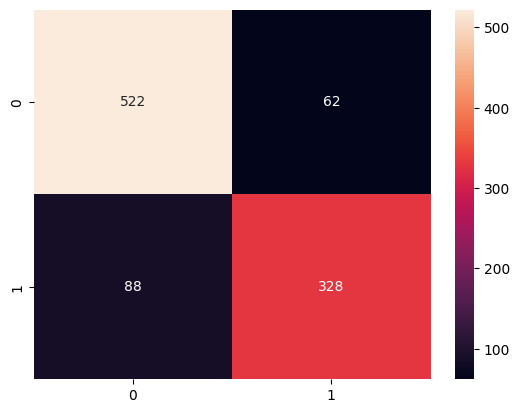

In [37]:
print(classification_report(predict_naive, y_test))
sn.heatmap(confusion_matrix(predict_naive, y_test), annot=True, fmt='.0f')

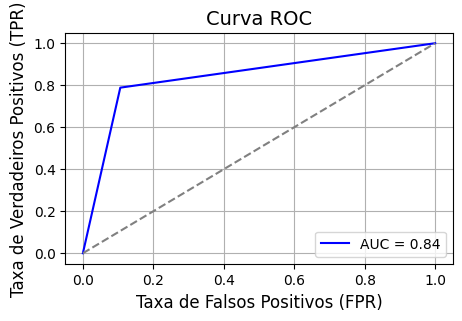

In [50]:
plot_curve_roc(y_test, predict_naive)

#### K-Nearest Neighbour (KNN)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       618
           1       0.80      0.81      0.81       382

    accuracy                           0.85      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.85      0.85      0.85      1000



<Axes: >

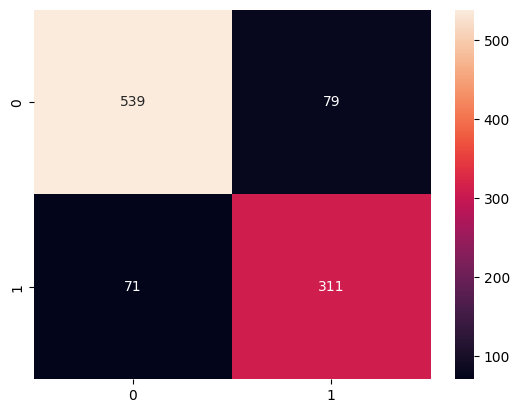

In [38]:
print(classification_report(predict_knn, y_test))
sn.heatmap(confusion_matrix(predict_knn, y_test), annot=True, fmt='.0f')

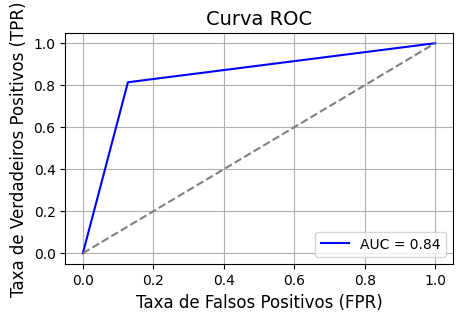

In [51]:
plot_curve_roc(y_test, predict_knn)

#### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       601
           1       0.85      0.83      0.84       399

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



<Axes: >

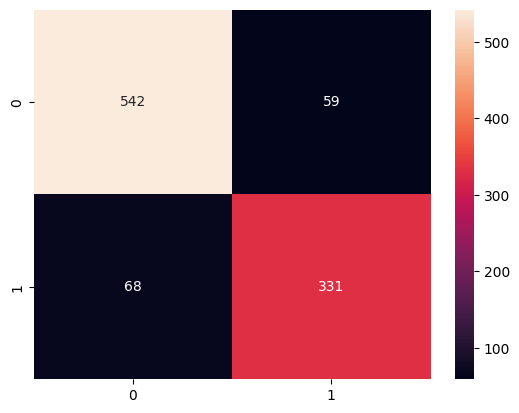

In [39]:
print(classification_report(predict_random, y_test))
sn.heatmap(confusion_matrix(predict_random, y_test), annot=True, fmt='.0f')

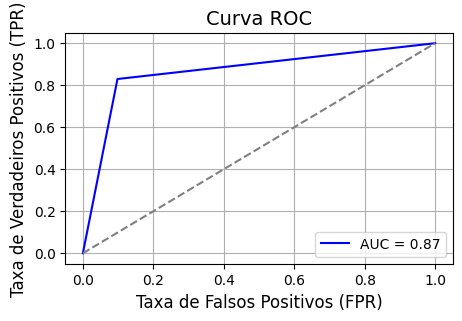

In [52]:
plot_curve_roc(y_test, predict_random)

## Conclusão:

Entre os algoritmos que obteve o melhor desempenho, pode-se afirmar que o **Random Forest Classifier** foi o modelo que apresentou os melhores resultados entre os demais, alcançando **87%** de acurácia e equilibrando nas métricas precision e recall nas duas classes. Os demais alcançaram um bom desempenho, no entanto o random forest mesmo assim teve um desempenho superior.